# AI - MLP Project

## Function output prediction

### Ahmad Salimi - 97106013

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

In [31]:
def vectorize(funcs) :
    def fnv(arr) :
        return np.vstack([f(arr) for f in funcs]).T
    return fnv

In [181]:
def feature_transform(X):
        return vectorize((lambda x: np.ones(x.shape), lambda x: x, lambda x: x**2, lambda x: x**3, np.sin))(X)

In [255]:
def make_random_dataset(function, size:int, domain):
        # X = np.random.uniform(domain[0], domain[1], size)
        X = np.arange(domain[0], domain[1], (domain[1] - domain[0]) / size)
        y = function(X).reshape(size,)
        return X, y

In [202]:
def create_model(input_shape, neurons):
        model = Sequential()
        # model.add(Dense(neurons, input_shape=input_shape, activation='linear', kernel_initializer="uniform"))
        for i in range(0):
            model.add(Dense(neurons, activation='relu'))
        model.add(Dense(1, activation='linear'))
        
        model.compile(loss='mse', optimizer='adam')
        return model

In [318]:
def plot_result(x, model, function, x_train, y_train, xlim=None, ylim=None):
        x.sort()
        plt.figure(figsize=(25, 15))
        plt.plot(x, function(x), color='skyblue', label='original', linewidth=12, zorder=1)
        plt.scatter(x_train, y_train, color='green', label='train data', s=50, zorder=2)
        plt.plot(x, model.predict(x), color='red', label='predicted', linewidth=3, zorder=3)
        plt.grid()
        if xlim:
            plt.xlim(xlim)
        if ylim:
            plt.ylim(ylim)
        plt.legend()

In [175]:
function = lambda x: np.sin(x)

In [208]:
X, y = make_random_dataset(function, 1000, (-10, 10))
X_features = feature_transform(X)
X_features.shape

(1000, 5)

In [209]:
model = create_model([5], 1)

In [210]:
model.fit(X_features, y, batch_size=32, epochs=50, verbose=1, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/50
800/800 [==============================] - 0s 85us/step - loss: 51967.1094 - val_loss: 49113.3016
Epoch 2/50
800/800 [==============================] - 0s 35us/step - loss: 47917.1675 - val_loss: 45221.9396
Epoch 3/50
800/800 [==============================] - 0s 35us/step - loss: 44169.9993 - val_loss: 41620.8470
Epoch 4/50
800/800 [==============================] - 0s 38us/step - loss: 40669.3415 - val_loss: 38238.4464
Epoch 5/50
800/800 [==============================] - 0s 39us/step - loss: 37367.2527 - val_loss: 35090.2140
Epoch 6/50
800/800 [==============================] - 0s 38us/step - loss: 34267.3558 - val_loss: 32147.0749
Epoch 7/50
800/800 [==============================] - 0s 50us/step - loss: 31349.9386 - val_loss: 29430.5863
Epoch 8/50
800/800 [==============================] - 0s 37us/step - loss: 28634.2683 - val_loss: 26903.4627
Epoch 9/50
800/800 [==============================] - 0s 35us/step - loss: 26118.9

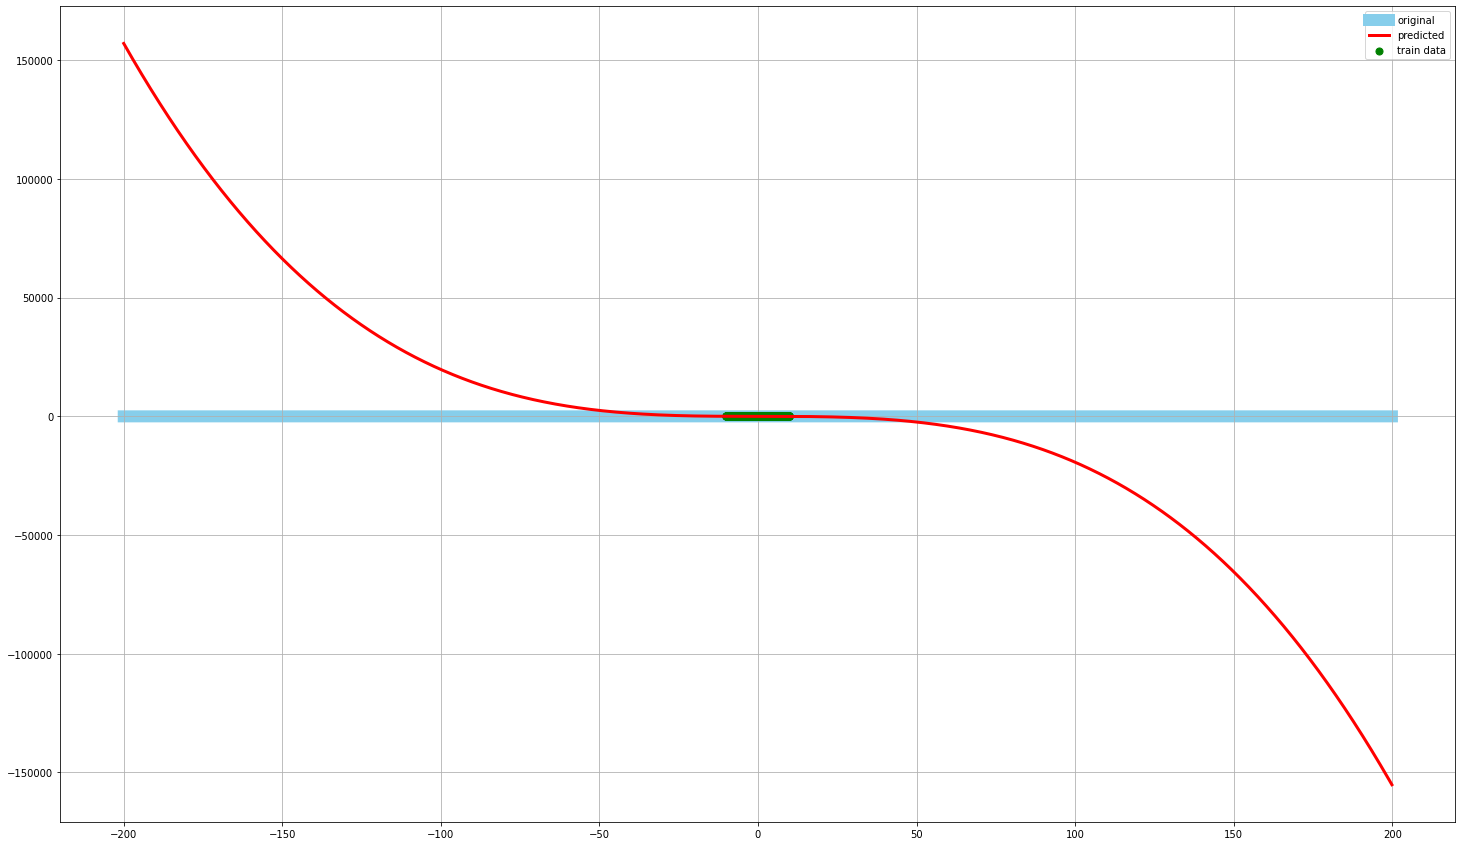

In [211]:
plot_result(np.arange(-200, 200, 0.1), model, function, X, y)

In [134]:
class FunctionLearner:
    
    def __init__(self, function, data_size, train_domain=(-100, 100)):
        self.function = function
        self.X, self.y = self.make_random_dataset(data_size, train_domain)
        self.model = self.create_model()

    def feature_transform(self, X):
        return vectorize((lambda x: np.ones(x.shape), lambda x: x, lambda x: x**2, lambda x: x**3, lambda x: np.sin(x)))(X)
    
    def make_random_dataset(self, size:int, domain):
        X = np.random.uniform(domain[0], domain[1], size)
        y = self.function(X).reshape(size,)
        return self.feature_transform(X), y
    
    def create_model(self):
        model = Sequential()
        model.add(Dense(32, input_shape=self.X.shape[1:], activation='relu', kernel_initializer="uniform"))
        for i in range(1):
            model.add(Dense(64, activation='relu'))
        model.add(Dense(1, activation='relu'))
        
        model.compile(loss='mse', optimizer='adam')
        return model
    
    def plot_result(self, x, xlim=None, ylim=None):
        x.sort()
        plt.figure(figsize=(25, 15))
        plt.plot(x, self.function(x), color='skyblue', label='original', linewidth=12, zorder=1)
        plt.scatter(self.X_train, self.y_train, color='green', label='train data', s=50, zorder=2)
        plt.plot(x, self.model.predict(x), color='red', label='predicted', linewidth=3, zorder=3)
        plt.grid()
        if xlim:
            plt.xlim(xlim)
        if ylim:
            plt.ylim(ylim)
        plt.legend()
    
    def learn(self):
        self.model.fit(self.X, self.y, batch_size=32, epochs=50, verbose=1, validation_split=0.2)

In [136]:
learner = FunctionLearner(lambda x: 100 * np.sin(x), 10000, (0.000001, 100000))
learner.learn()

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 0s 57us/step - loss: nan - val_loss: nan
Epoch 2/50
8000/8000 [==============================] - 0s 44us/step - loss: nan - val_loss: nan
Epoch 3/50
8000/8000 [==============================] - 0s 45us/step - loss: nan - val_loss: nan
Epoch 4/50
8000/8000 [==============================] - 0s 43us/step - loss: nan - val_loss: nan
Epoch 5/50
8000/8000 [==============================] - 0s 40us/step - loss: nan - val_loss: nan
Epoch 6/50
8000/8000 [==============================] - 0s 42us/step - loss: nan - val_loss: nan
Epoch 7/50
8000/8000 [==============================] - 0s 44us/step - loss: nan - val_loss: nan
Epoch 8/50
8000/8000 [==============================] - 0s 41us/step - loss: nan - val_loss: nan
Epoch 9/50
8000/8000 [==============================] - 0s 43us/step - loss: nan - val_loss: nan
Epoch 10/50
8000/8000 [==============================] - 0s 42us/step - loss: n

KeyboardInterrupt: ignored

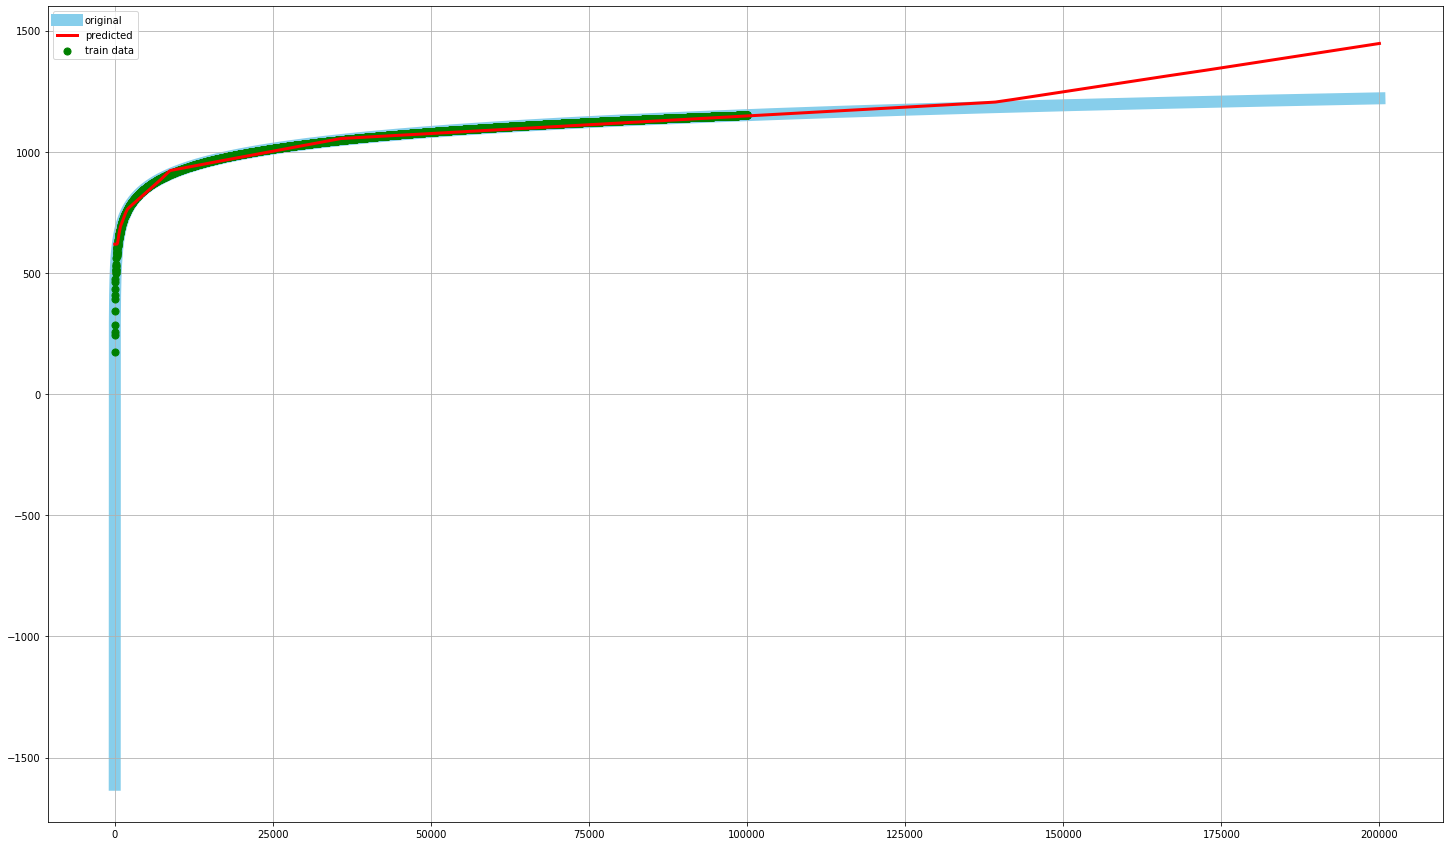

In [ ]:
learner.plot_result(np.arange(0.0000001, 200000, 5))

In [39]:
learner = FunctionLearner(lambda x: 50 * x ** 3, 10000, (-1000, 1000))
learner.learn()

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 0s 50us/step - loss: nan - val_loss: nan
Epoch 2/50
8000/8000 [==============================] - 0s 39us/step - loss: nan - val_loss: nan
Epoch 3/50
8000/8000 [==============================] - 0s 40us/step - loss: nan - val_loss: nan
Epoch 4/50
8000/8000 [==============================] - 0s 41us/step - loss: nan - val_loss: nan
Epoch 5/50
8000/8000 [==============================] - 0s 39us/step - loss: nan - val_loss: nan
Epoch 6/50
8000/8000 [==============================] - 0s 40us/step - loss: nan - val_loss: nan
Epoch 7/50
8000/8000 [==============================] - 0s 39us/step - loss: nan - val_loss: nan
Epoch 8/50
8000/8000 [==============================] - 0s 39us/step - loss: nan - val_loss: nan
Epoch 9/50
8000/8000 [==============================] - 0s 40us/step - loss: nan - val_loss: nan
Epoch 10/50
8000/8000 [==============================] - 0s 41us/step - loss: n

KeyboardInterrupt: ignored

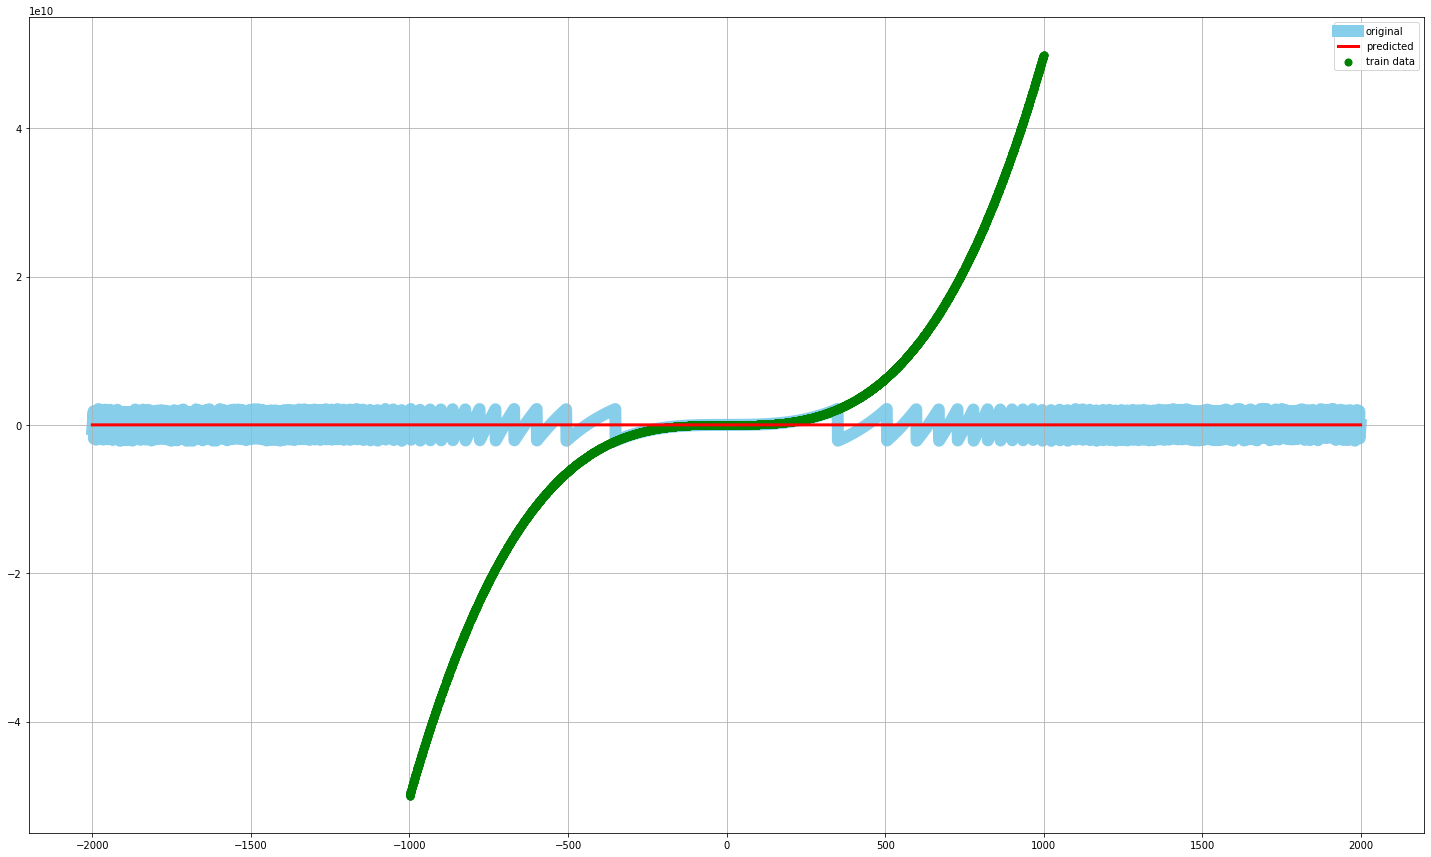

In [ ]:
learner.plot_result(np.arange(-2000, 2000, 1))

In [319]:
def create_model2():

    # design the neural network model
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1))

    opt = keras.optimizers.adam(learning_rate=.001)
    model.compile(optimizer=opt, loss='mse')
    return model

In [326]:
function = lambda x: np.sin(x)

In [327]:
X, y = make_random_dataset(function, 100, (-10, 10))

In [328]:
model = create_model2()

In [348]:
model.fit(X, y, batch_size=10, epochs=1000, verbose=0)

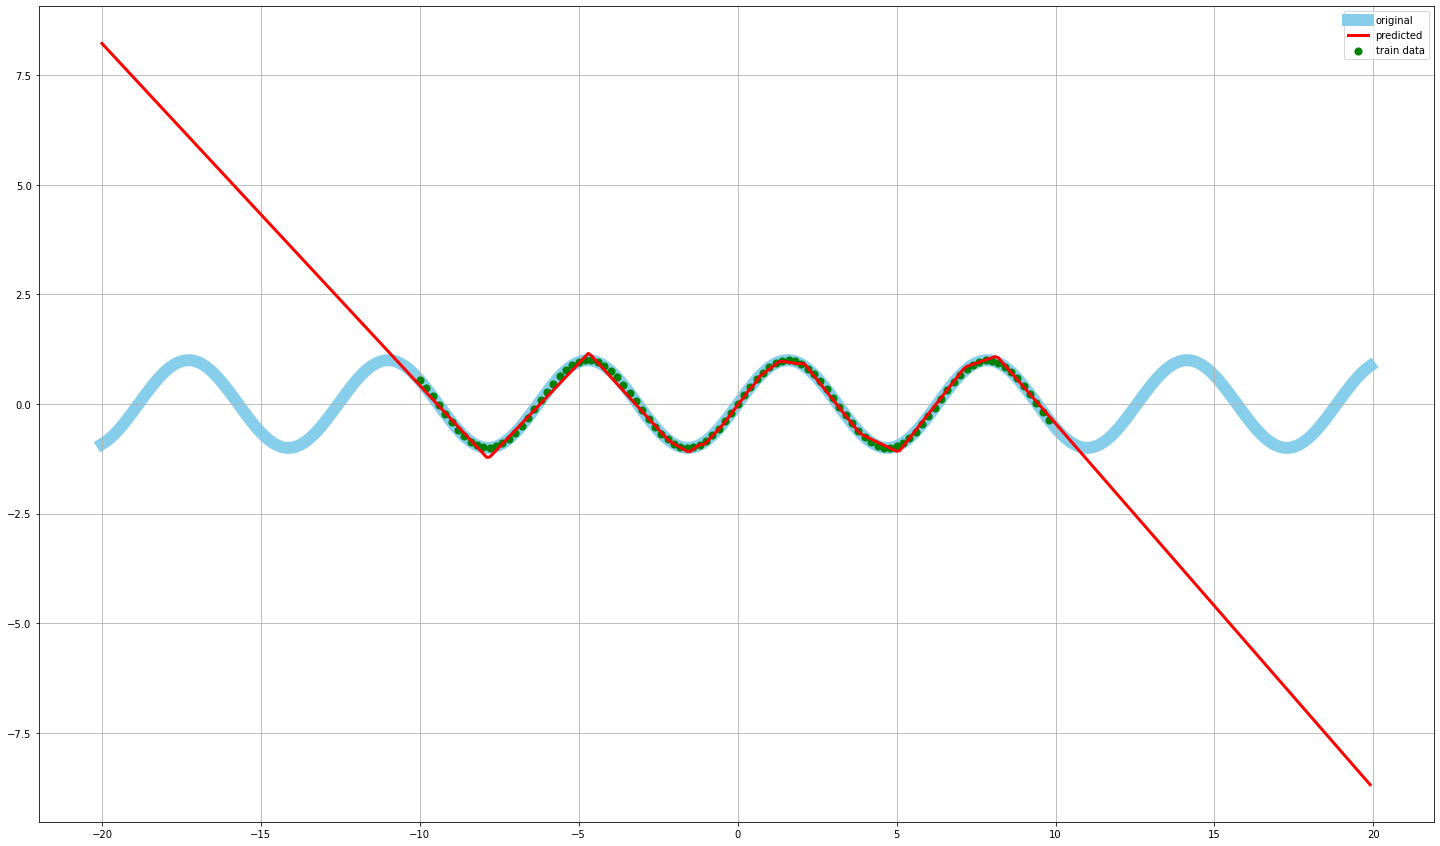

In [349]:
plot_result(np.arange(-20, 20, 0.1), model, function, X, y)